## Import Library

In [120]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Understanding

In [121]:
# Read dataset
df_customer = pd.read_csv('dataset/customer.csv', delimiter=';')
df_product = pd.read_csv('dataset/product.csv', delimiter=';')
df_store = pd.read_csv('dataset/store.csv', delimiter=';')
df_transaction = pd.read_csv('dataset/transaction.csv', delimiter=';')

In [122]:
# Merge dataset
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product, on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [123]:
# Menampilkan 5 data teratas
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [124]:
# Menampilkan total baris dan kolom
print(f'Total baris pada datset : {df_merge.shape[0]}')
print(f'Total kolom pada datset : {df_merge.shape[1]}')

Total baris pada datset : 5020
Total kolom pada datset : 19


In [125]:
# Menampilkan informasi attribut
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   Age             5020 non-null   int64 
 9   Gender          5020 non-null   int64 
 10  Marital Status  4976 non-null   object
 11  Income          5020 non-null   object
 12  Product Name    5020 non-null   object
 13  Price_y         5020 non-null   int64 
 14  StoreName       5020 non-null   object
 15  GroupStore      5020 non-null   object
 16  Type            5020 non-null   object
 17  Latitude        5020 non-null   object
 18  Longitud

In [126]:
# Mengecek missing value
print('Jumlah missing value untuk setiap kolom')
df_merge.isnull().sum()

Jumlah missing value untuk setiap kolom


TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_y            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [127]:
# Mengecek data duplicate
duplicate_count = df_merge.duplicated().sum()
print(f"Jumlah data duplikat secara keseluruhan: {duplicate_count}")

Jumlah data duplikat secara keseluruhan: 0


In [128]:
# Menampilkan correlation matrix
df_merge.corr(numeric_only=True)

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Price_y
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,-0.016423
Price_x,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,1.000000
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.353640
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,0.440632
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,-0.032863
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.014693
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,0.010705
Price_y,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,1.000000


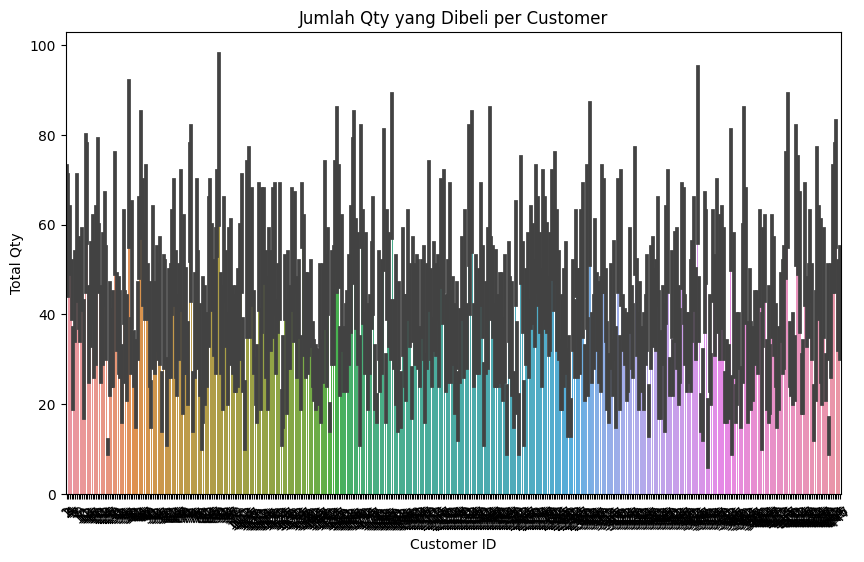

In [129]:
# Visualisasi: Jumlah qty yang dibeli oleh setiap customer_id
plt.figure(figsize=(10, 6))
sns.barplot(data=df_merge, x='CustomerID', y='Qty', estimator=sum)
plt.title('Jumlah Qty yang Dibeli per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Qty')
plt.xticks(rotation=45)
plt.show()

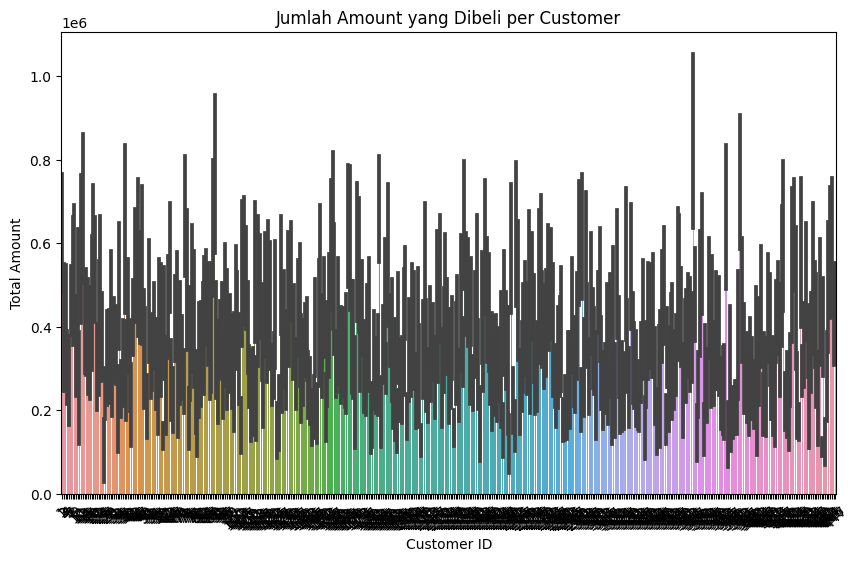

In [130]:
# Visualisasi: Jumlah amount yang dibeli oleh setiap customer_id
plt.figure(figsize=(10, 6))
sns.barplot(data=df_merge, x='CustomerID', y='TotalAmount', estimator=sum)
plt.title('Jumlah Amount yang Dibeli per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

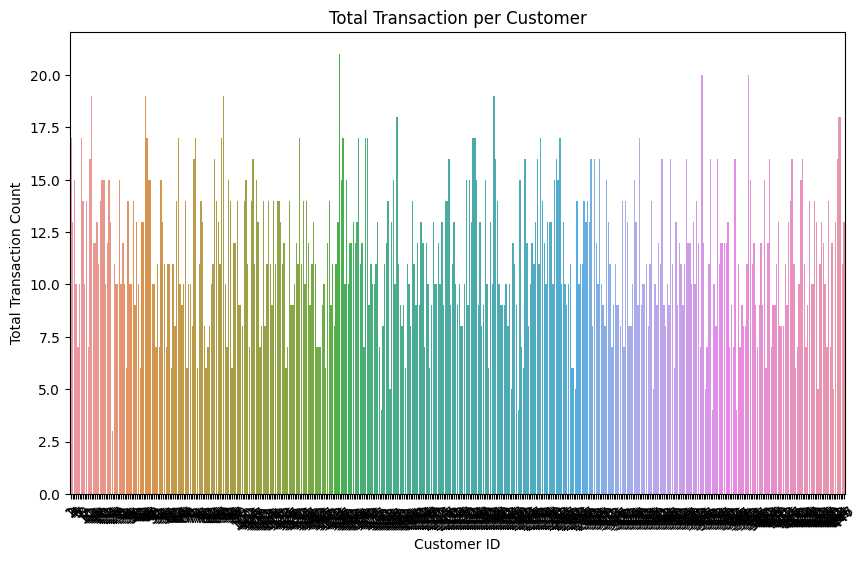

In [131]:
# Visualisasi: Total transaction yang dilakukan oleh setiap customer_id
transaction_count = df_merge['CustomerID'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Total Transaction per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Count')
plt.xticks(rotation=45)
plt.show()

## Data Preparation

In [132]:
# Menghilangkan missing value
df_merge = df_merge.dropna()

In [133]:
# Membuat data baru untuk clustering
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    # 'TotalAmount' : 'sum'
}).reset_index()
df_cluster.rename(columns = {'TransactionID':'Total Transaction', 'TotalAmount' : 'Total Amount'}, inplace = True)

In [134]:
# Membuang kolom CustomerID
df_cluster = df_cluster.drop(columns=['CustomerID'])
df_cluster.head()

,Total Transaction,Qty
0,17,60
1,13,57
2,15,56
3,10,46
4,7,27


In [135]:
# Melakukan normalisasi MinMax
scaler = MinMaxScaler()

df_normalized = scaler.fit_transform(df_cluster)
df_normalized = pd.DataFrame(df_normalized, columns=df_cluster.columns, index=df_cluster.index)
df_normalized.head()

,Total Transaction,Qty
0,0.777778,0.724638
1,0.555556,0.681159
2,0.666667,0.666667
3,0.388889,0.521739
4,0.222222,0.246377


## Modeling

In [136]:
K = range(2, 15)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(df_normalized)
    
    fits.append(model)
    score.append(silhouette_score(df_normalized, model.labels_, metric='euclidean'))

## Evaluation

<Axes: >

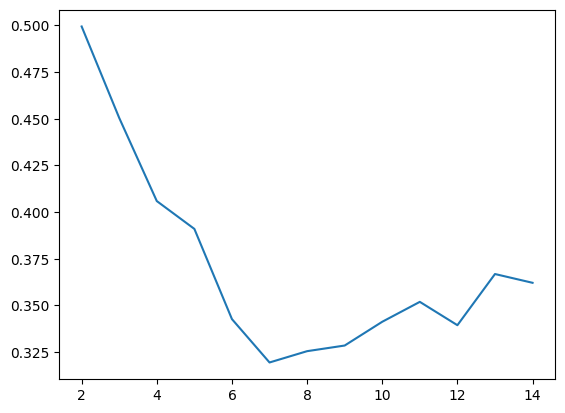

In [137]:
# Menampilkan grafik hasil silhouette score tiap K
sns.lineplot(x=K, y=score)